# РК2

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [2]:
data = pd.read_csv('googleplaystore.csv', sep = ",")

In [3]:
for i in range(len(data['Reviews'])):
    if data['Reviews'][i][-1] == 'M':
        data['Reviews'][i] = str(int(float(data['Reviews'][i][0:-1])) * 1000000)

<ipython-input-3-28e3fda95573>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Reviews'][i] = str(int(float(data['Reviews'][i][0:-1])) * 1000000)


In [4]:
data['Reviews'] = data['Reviews'].astype(str).astype(int)

In [5]:
for i in range(len(data['Installs'])):
    if(data['Installs'][i] == 'Free'):
        data['Installs'][i] = 0
        continue
    data['Installs'][i] = data['Installs'][i].replace(",", "")
    data['Installs'][i] = data['Installs'][i].replace("+", "")            
    data['Installs'][i] = str(int(float(data['Installs'][i])))

<ipython-input-5-9c6f0fc030bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'][i] = data['Installs'][i].replace(",", "")
<ipython-input-5-9c6f0fc030bc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'][i] = data['Installs'][i].replace("+", "")
<ipython-input-5-9c6f0fc030bc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'][i] = str(int(float(data['Installs'][i])))
<ipython-input-5-9c6f0

In [6]:
data['Installs'] = data['Installs'].astype(str).astype(int)

In [7]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
data = data.drop('App', 1)
data = data.drop('Price', 1)
data = data.drop('Last Updated', 1)
data = data.drop('Current Ver', 1)
data = data.drop('Android Ver', 1)
data = data.drop('Size', 1)
data = data.drop('Content Rating', 1)

In [10]:
data.isnull().sum()

Category       0
Rating      1474
Reviews        0
Installs       0
Type           1
Genres         0
dtype: int64

In [11]:
data = data.dropna(axis=0, how='any')

In [12]:
data.head()

,Category,Rating,Reviews,Installs,Type,Genres
0,ART_AND_DESIGN,4.1,159,10000,Free,Art & Design
1,ART_AND_DESIGN,3.9,967,500000,Free,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,5000000,Free,Art & Design
3,ART_AND_DESIGN,4.5,215644,50000000,Free,Art & Design
4,ART_AND_DESIGN,4.3,967,100000,Free,Art & Design;Creativity


## Закодируем категриальные признаки

In [13]:
data = pd.get_dummies(data)

In [14]:
data.head()

,Rating,Reviews,Installs,Category_1.9,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,159,10000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,500000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,5000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,50000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,100000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
columns = data.columns.tolist()
column = columns.pop(columns.index("Rating"))
columns.append(column)

data = data[columns]

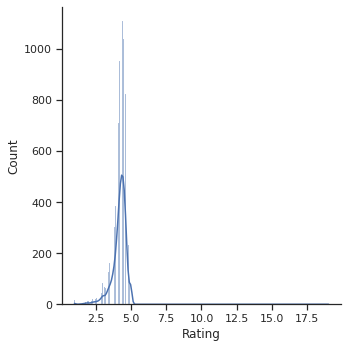

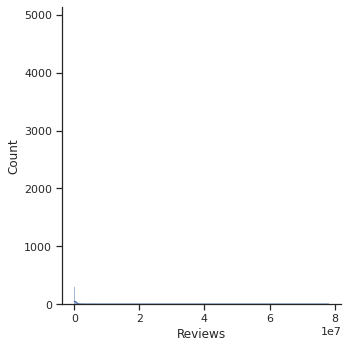

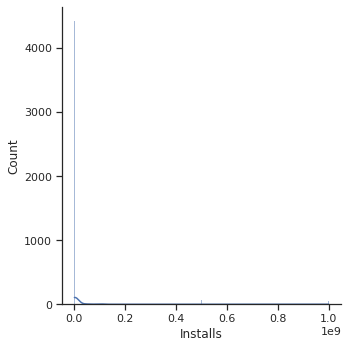

In [16]:
sns.displot(data=data, x="Rating", kde = True)
sns.displot(data=data, x="Reviews", kde = True)
sns.displot(data=data, x="Installs", kde = True)

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mms = MinMaxScaler()
Power = mms.fit_transform(data[['Rating']])
data["Rating"] = Power

In [19]:
ss = StandardScaler()
Accuracy = ss.fit_transform(data[['Reviews']])
data["Reviews"] = Accuracy

In [20]:
ss = StandardScaler()
Accuracy = ss.fit_transform(data[['Installs']])
data["Installs"] = Accuracy

In [21]:
data.head()

,Reviews,Installs,Category_1.9,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Rating
0,-0.163546,-0.196052,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.172222
1,-0.163288,-0.190681,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.161111
2,-0.135760,-0.141354,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.205556
3,-0.095003,0.351912,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.194444
4,-0.163288,-0.195065,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.183333


## Разделим выборку

In [27]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split

y_column = "Rating"
x_columns = data.columns.tolist()
x_columns.pop(x_columns.index(y_column))

data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data[x_columns], data[y_column], test_size = 0.8, random_state = 15)

## Дерево решений

In [28]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

DTR = DecisionTreeRegressor(max_depth=4)
DTR.fit(data_x_train, data_y_train)

dtr_y_pred = DTR.predict(data_x_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score

print('Средняя абсолютная ошибка:',   mean_absolute_error(data_y_test, dtr_y_pred))
print('Медианная абсолютная ошибка:',   median_absolute_error(data_y_test, dtr_y_pred))
print('Среднеквадратичная ошибка:',   mean_squared_error(data_y_test, dtr_y_pred, squared = False))
print('Коэффициент детерминации:',   r2_score(data_y_test, dtr_y_pred))

Средняя абсолютная ошибка: 0.01925527343826007
Медианная абсолютная ошибка: 0.013372093023256232
Среднеквадратичная ошибка: 0.029547263347784663
Коэффициент детерминации: 0.05500701014768772


## Градиентный бустинг

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor(n_estimators=5, random_state = 10)
GB.fit(data_x_train, data_y_train)

gb_y_pred = GB.predict(data_x_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score

print('Средняя абсолютная ошибка:',   mean_absolute_error(data_y_test, gb_y_pred))
print('Медианная абсолютная ошибка:',   median_absolute_error(data_y_test, gb_y_pred))
print('Среднеквадратичная ошибка:',   mean_squared_error(data_y_test, gb_y_pred, squared = False))
print('Коэффициент детерминации:',   r2_score(data_y_test, gb_y_pred))

Средняя абсолютная ошибка: 0.019567543855631846
Медианная абсолютная ошибка: 0.014426201886080015
Среднеквадратичная ошибка: 0.029607902637460486
Коэффициент детерминации: 0.0511242474950766
